<a href="https://colab.research.google.com/github/JoseBatista2010/ML2023-Jose-Batista/blob/master/Limpando_e_Filtrando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS DAS BIBLIOTECAS NECESSÁRIAS PARA MANIPULAÇÃO**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
plt.style.use(['ggplot', 'dark_background'])


**PATH PARA O ENDEREÇO DA TABELA NO GOOGLE DRIVE**

In [ ]:
path = '/content/drive/MyDrive/UFC/2023_1/Machine_Learning/Dataset/Feminicidio_2015_2022.xlsx'

df0 = pd.read_excel(path, sheet_name= 0)
df1 = pd.read_excel(path, sheet_name= 1)
df2 = pd.read_excel(path, sheet_name= 2)
df3 = pd.read_excel(path, sheet_name= 3)
df4 = pd.read_excel(path, sheet_name= 4)
df5 = pd.read_excel(path, sheet_name= 5)
df6 = pd.read_excel(path, sheet_name= 6)
df7 = pd.read_excel(path, sheet_name= 7)

df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7], axis=0)

df = df.loc[df['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo']
df.fillna("NOT SPECIFIED", inplace=True)

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


**PASSANDO TODOS OS CARACTERES PARA LOWERCASE**

In [ ]:
for col in df.columns:
    # Verifica se a coluna é do tipo string
    if df[col].dtype == 'object':
        # Converte todos os caracteres em minúsculas
        df[col] = df[col].str.lower()

**SEPARANDO A DATA DE NASCIMENTO**

In [ ]:
df['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(df['DATA_NASCIMENTO_PESSOA'], errors='coerce')

df['ANO'] = df['DATA_NASCIMENTO_PESSOA'].dt.year
df['MES'] = df['DATA_NASCIMENTO_PESSOA'].dt.month
df['DIA'] = df['DATA_NASCIMENTO_PESSOA'].dt.day

df['MES_BO'] = df['DATAHORA_REGISTRO_BO'].dt.month
df['DIA_BO'] = df['DATAHORA_REGISTRO_BO'].dt.day

**RELAÇÂO DIA/MÊS DO B.O**

<BarContainer object of 232 artists>

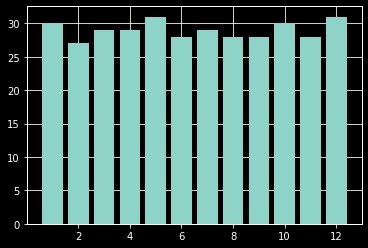

In [ ]:
plt.bar(df['MES_BO'], df['DIA_BO'])

In [ ]:

df


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO,ANO,MES,DIA,MES_BO,DIA_BO
3,decap,8ª sec,são paulo,049 dp - são mateus,NaN,1,20249,4,2015,2015-04-25 00:40:09,...,NaT,branca,estudante,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,4,25
6,decap,8ª sec,são paulo,055 dp - parque são rafael,NaN,1,200100,5,2015,2015-05-16 19:57:57,...,NaT,parda,atendente,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,5,16
34,decap,7ª sec,são paulo,032 dp - itaquera,NaN,1,10326,11,2015,2015-11-28 17:07:48,...,NaT,branca,operador(a) telemarketing,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,11,28
35,decap,2ª sec,são paulo,095 dp - heliópolis,NaN,1,10358,11,2015,2015-11-04 12:15:35,...,NaT,branca,corretor(a) de imoveis,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,11,4
39,decap,6ª sec,são paulo,047 dp - capão redondo,NaN,1,10247,12,2015,2015-12-21 12:57:28,...,NaT,parda,secretario(a),homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,decap,4ª sec,são paulo,074 dp - jaraguá,NaN,1,20103,12,2022,2022-12-19 00:00:00,...,NaT,branca,not specified,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,12,19
177,decap,5ª sec,são paulo,042 dp - parque são lucas,NaN,1,10310,12,2022,2022-12-21 00:00:00,...,NaT,branca,auxiliar de limpeza,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,12,21
178,decap,6ª sec,são paulo,047 dp - capão redondo,NaN,1,10247,12,2022,2022-12-05 00:00:00,...,NaT,parda,atendente de telemarketing,homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,12,5
179,decap,7ª sec,são paulo,063 dp - vila jacuí,NaN,1,10326,12,2022,2022-12-10 00:00:00,...,NaT,parda,cabeleireiro(a),homicídio doloso,feminicídio-contra a mulher por razões da cond...,NaN,NaN,NaN,12,10


<Axes: >

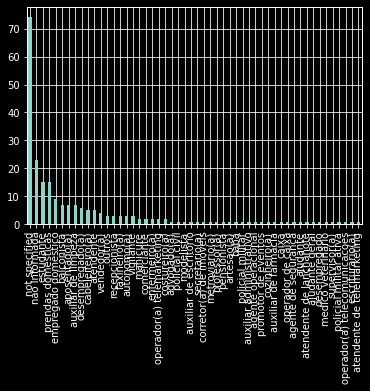

In [ ]:
contagem_profissao = df['PROFISSAO'].value_counts()
contagem_profissao.plot(kind='bar')

Text(0, 0.5, 'Idade')

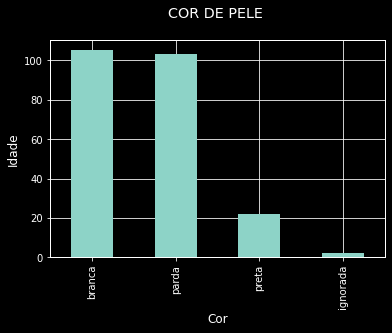

In [ ]:
contagem_cor = df['COR_PELE'].value_counts()
contagem_cor.plot(kind='bar')
plt.title('COR DE PELE \n')
plt.xlabel('Cor')
plt.ylabel('Idade')